# BANK LOAN ANALYSIS REPORT 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px 


In [4]:
df= pd.read_csv(r"C:\Users\91763\Desktop\Data_Analytic_project\Bank Dashboard\financial_loan.csv")

In [7]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [9]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,11-07-2021,16-05-2021,16-05-2021,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


##  Metadata of data

In [12]:
print("No of Rows :", df.shape[0])

No of Rows : 38576


In [14]:
print("No of Columns :", df.shape[1])

No of Columns : 24


In [16]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT  11-02-2021   
1                       MKC Accounting     E           RENT  01-01-2021   
2                Chema

###  Data Types

In [19]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [21]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [23]:
df['issue_date'] = pd.to_datetime(df['issue_date'],dayfirst=True)
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'],dayfirst=True)
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'],dayfirst=True)
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'],dayfirst=True)

### Total Loan Application 

In [26]:
total_loan_application= df['id'].count()
print("Total Loan Application :" , total_loan_application)

Total Loan Application : 38576


###  MTD Total Loan Application 

In [29]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year== latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application= mtd_data['id'].count()
print(f"MTD Loan Application (For {latest_issue_date.strftime('%B %Y')}):{mtd_loan_application} ")

MTD Loan Application (For December 2021):4314 


###  Total Funded Amount

In [32]:
total_funded_amount= df['loan_amount'].sum()
total_funded_amount_million= total_funded_amount/1000000
print(f"Total Funded Amount : ${total_funded_amount_million : .2f} M")

Total Funded Amount : $ 435.76 M


###  MTD Total Funded Amount

In [35]:
mtd_funded_amount= mtd_data['loan_amount'].sum()
mtd_funded_amount_million= mtd_funded_amount/1000000
print(f"MTD Total Funded Amount : ${mtd_funded_amount_million : .2f} M")

MTD Total Funded Amount : $ 53.98 M


###  Total Amount Received 

In [38]:
total_amount_received =df['total_payment'].sum()
total_amount_received_million= total_amount_received/1000000
print(f"Total Amount Received : ${total_amount_received_million : .2f} M")

Total Amount Received : $ 473.07 M


###  MTD Total Funded Amount

In [41]:
mtd_amount_received = mtd_data['total_payment'].sum()
mtd_amount_received_million= mtd_amount_received/1000000
print(f"MTD Total Amount Received : ${mtd_amount_received_million : .2f} M")

MTD Total Amount Received : $ 58.07 M


###  Average Interest  Rate 

In [44]:
Avg_int_rate= df['int_rate'].mean()*100
print(f"Average Interest Rate : {Avg_int_rate : .2f} %")

Average Interest Rate :  12.05 %


###  Average DTI (debt-to-income ratio)

In [47]:
Avg_dti = df['dti'].mean()*100
print(f"Average DTI : {Avg_dti : .2f} %")

Average DTI :  13.33 %


###  Good Loan Metrics 

In [50]:
good_loan= df[df['loan_status'].isin(["Fully Paid" , "Current"])]
good_loan_application= good_loan['id'].count()
good_loan_funded_amount= good_loan['loan_amount'].sum()
good_loan_amount_received =good_loan['total_payment'].sum()
good_loan_funded_amount_million= good_loan_funded_amount/1000000
good_loan_amount_received_million= good_loan_amount_received/1000000 
good_loan_percentage = (good_loan_application/total_loan_application )*100 

print("Good Loan Application :" , good_loan_application)
print(f"Good loan Funded Amount (In Million ): ${good_loan_funded_amount_million : .2f} M")
print(f"Good loan Amount Received (In Million ): ${good_loan_amount_received_million : .2f} M")
print(f"Percentage of Good loan Application: {good_loan_percentage : .2f} %")


Good Loan Application : 33243
Good loan Funded Amount (In Million ): $ 370.22 M
Good loan Amount Received (In Million ): $ 435.79 M
Percentage of Good loan Application:  86.18 %


###  Bad Loan Metrics 

In [53]:
bad_loan= df[df['loan_status'].isin(["Charged Off"])]
bad_loan_application= bad_loan['id'].count()
bad_loan_funded_amount= bad_loan['loan_amount'].sum()
bad_loan_amount_received =bad_loan['total_payment'].sum()
bad_loan_funded_amount_million= bad_loan_funded_amount/1000000
bad_loan_amount_received_million= bad_loan_amount_received/1000000 
bad_loan_percentage = (bad_loan_application/total_loan_application )*100 

print("Bad Loan Application :" , bad_loan_application)
print(f"Bad loan Funded Amount (In Million ): ${bad_loan_funded_amount_million : .2f} M")
print(f"Bad loan Amount Received (In Million ):$ {bad_loan_amount_received_million : .2f} M")
print(f"Percentage of Bad loan Application: {bad_loan_percentage : .2f} %")


Bad Loan Application : 5333
Bad loan Funded Amount (In Million ): $ 65.53 M
Bad loan Amount Received (In Million ):$  37.28 M
Percentage of Bad loan Application:  13.82 %


###  Monthly Trends by Issue Date  for Total Funded Amount 

In [56]:
monthly_funded= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name= 'loan_amount_millions')
    
)

In [58]:
monthly_funded

,month_name,loan_amount_millions
0,Jan 2021,25.031650
1,Feb 2021,24.647825
2,Mar 2021,28.875700
3,Apr 2021,29.800800
4,May 2021,31.738350
5,Jun 2021,34.161475
6,Jul 2021,35.813900
7,Aug 2021,38.149600
8,Sep 2021,40.907725
9,Oct 2021,44.893800


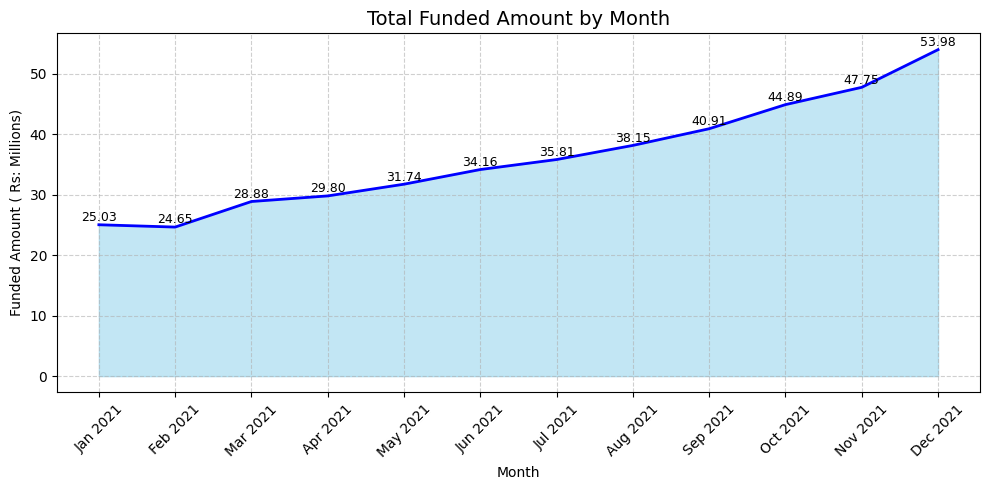

In [60]:
plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha =0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth =2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1, f"{row['loan_amount_millions']:.2f}", 
            ha='center', va='bottom' , fontsize=9, rotation=0, color= 'black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ( Rs: Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True , linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###  Monthly Trends by Issue Date  for Total Amount Received 

In [63]:
monthly_received= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name= 'loan_amount_millions')
    
)

In [65]:
monthly_received

,month_name,loan_amount_millions
0,Jan 2021,27.578836
1,Feb 2021,27.717745
2,Mar 2021,32.264400
3,Apr 2021,32.495533
4,May 2021,33.750523
5,Jun 2021,36.164533
6,Jul 2021,38.827220
7,Aug 2021,42.682218
8,Sep 2021,43.983948
9,Oct 2021,49.399567


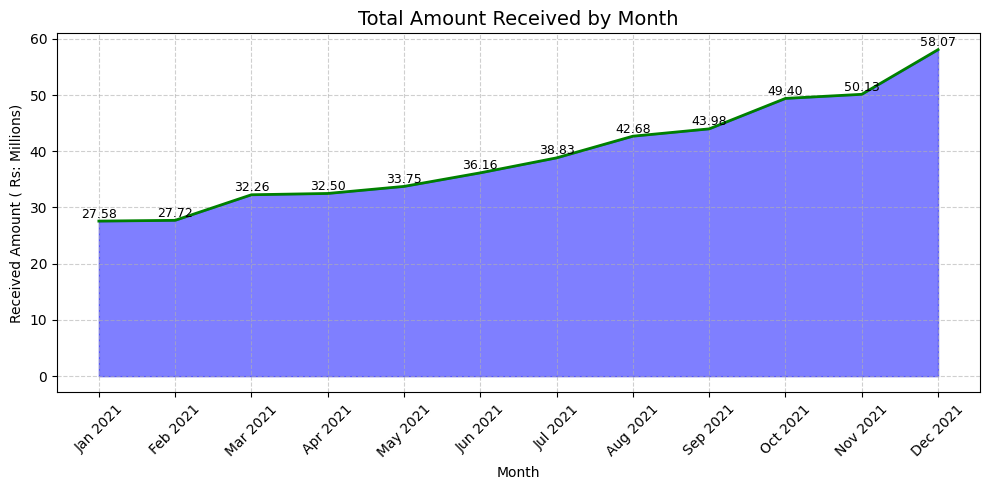

In [67]:
plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'], monthly_received['loan_amount_millions'], color='blue', alpha =0.5)
plt.plot(monthly_received['month_name'], monthly_received['loan_amount_millions'], color='green', linewidth =2)

for i, row in monthly_received.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1, f"{row['loan_amount_millions']:.2f}", 
            ha='center', va='bottom' , fontsize=9, rotation=0, color= 'black')

plt.title('Total Amount Received by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ( Rs: Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True , linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###  Monthly Trends by Issue Date  for Total Loan Application 

In [70]:
monthly_application = (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name= 'loan_application_count')
    
)


In [71]:
monthly_application

,month_name,loan_application_count
0,Jan 2021,2332
1,Feb 2021,2279
2,Mar 2021,2627
3,Apr 2021,2755
4,May 2021,2911
5,Jun 2021,3184
6,Jul 2021,3366
7,Aug 2021,3441
8,Sep 2021,3536
9,Oct 2021,3796


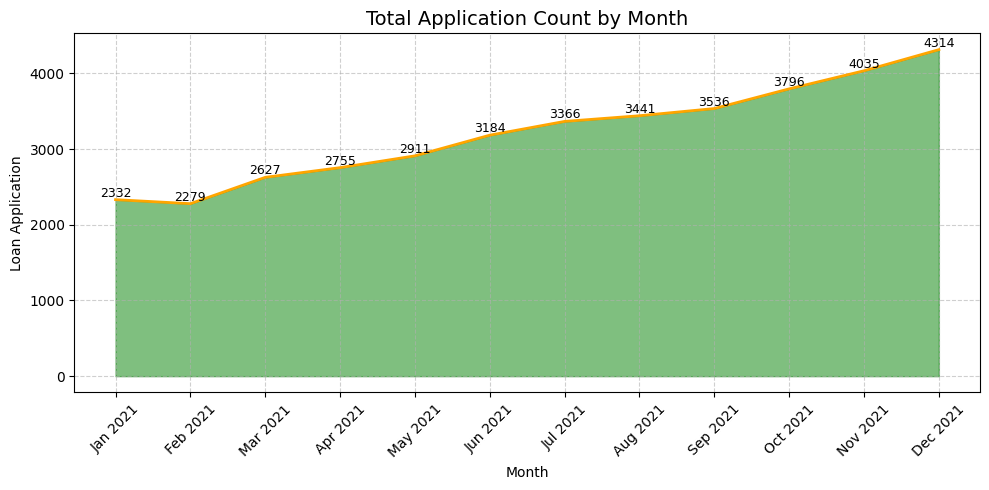

In [74]:
plt.figure(figsize=(10,5))
plt.fill_between(monthly_application['month_name'], monthly_application['loan_application_count'], color='green', alpha =0.5)
plt.plot(monthly_application['month_name'], monthly_application['loan_application_count'], color='orange', linewidth =2)

for i, row in monthly_application.iterrows():
    plt.text(i,row['loan_application_count']+0.1, f"{row['loan_application_count']}", 
            ha='center', va='bottom' , fontsize=9, rotation=0, color= 'black')

plt.title('Total Application Count by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Loan Application')
plt.xticks(ticks=range(len(monthly_application)), labels=monthly_application['month_name'], rotation=45)
plt.grid(True , linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###  Regional Analysis by State  for Total Funded Amount 

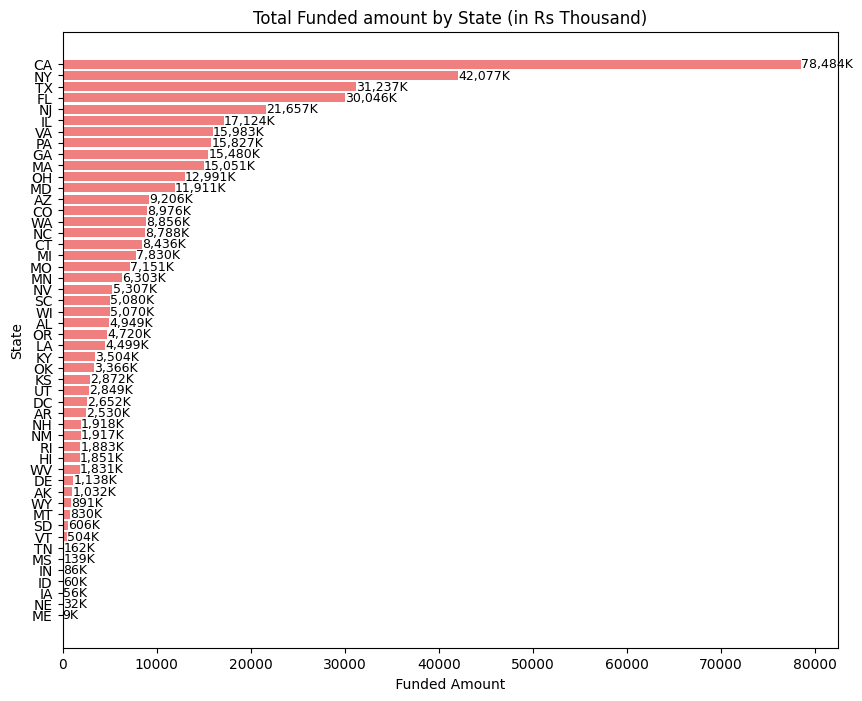

In [77]:
state_funding= df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True) 
state_funding_thousands= state_funding/1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding_thousands.index , state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width= bar.get_width() 
    plt.text(width+10, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded amount by State (in Rs Thousand)')
plt.xlabel(' Funded Amount ')
plt.ylabel('State')
plt.show()

###  Regional Analysis by State  for Total Amount Received 

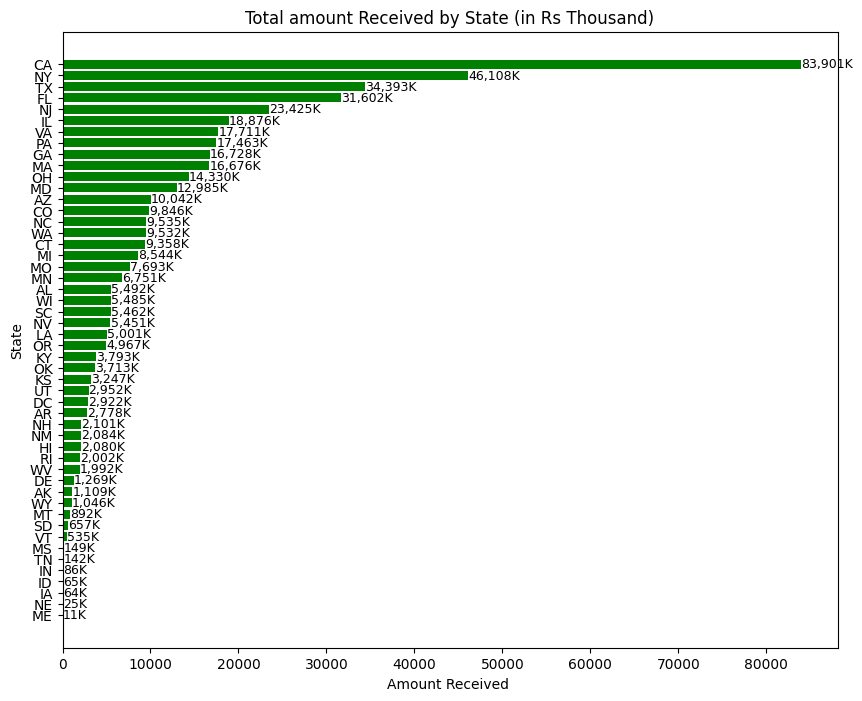

In [80]:
state_received= df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True) 
state_received_thousands= state_received/1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_received_thousands.index , state_received_thousands.values, color='green')

for bar in bars:
    width= bar.get_width() 
    plt.text(width+10, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total amount Received by State (in Rs Thousand)')
plt.xlabel('Amount Received ')
plt.ylabel('State')
plt.show()

###  Regional Analysis by State  for Total Loan Application 

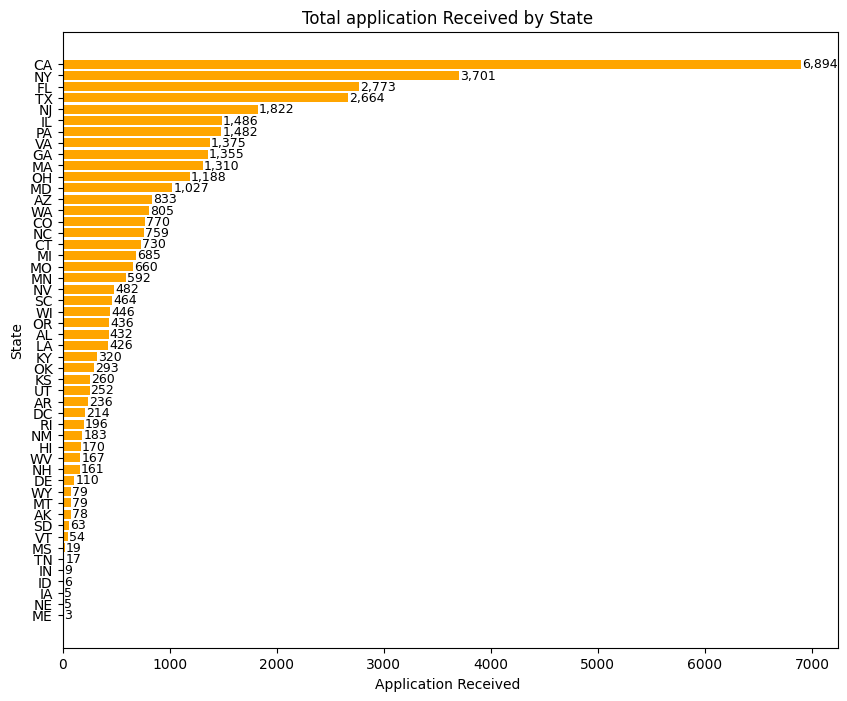

In [83]:
state_application= df.groupby('address_state')['id'].count().sort_values(ascending=True) 

plt.figure(figsize=(10,8))
bars= plt.barh(state_application.index , state_application.values, color='orange')

for bar in bars:
    width= bar.get_width() 
    plt.text(width+10, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}', va='center', fontsize=9)

plt.title('Total application Received by State ')
plt.xlabel('Application Received ')
plt.ylabel('State')
plt.show()

###  Term Analysis by Funded Amount

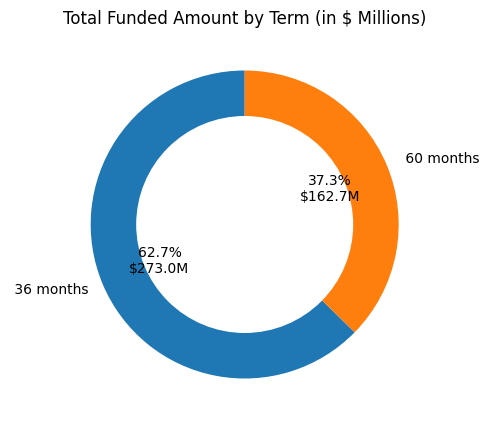

In [86]:
term_funded_million= df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funded_million, labels=term_funded_million.index , 
    autopct= lambda p: f"{p:.1f}%\n${p*sum(term_funded_million)/100:.1f}M", 
    startangle=90, 
    wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

###  Term Analysis by Amount Received 

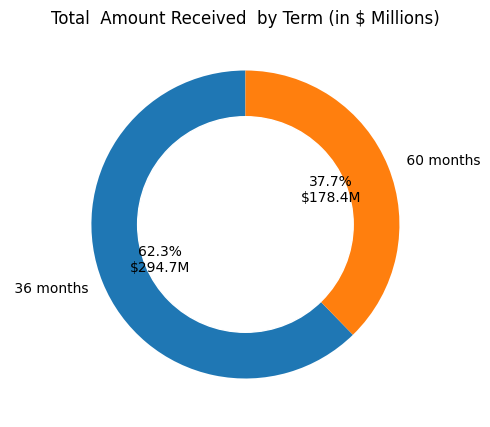

In [89]:
term_received_million= df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_received_million, labels=term_received_million.index , 
    autopct= lambda p: f"{p:.1f}%\n${p*sum(term_received_million)/100:.1f}M", 
    startangle=90, 
    wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.70, color='white'))
plt.title("Total  Amount Received  by Term (in $ Millions)")
plt.show()

###  Term Analysis by Loan Application 

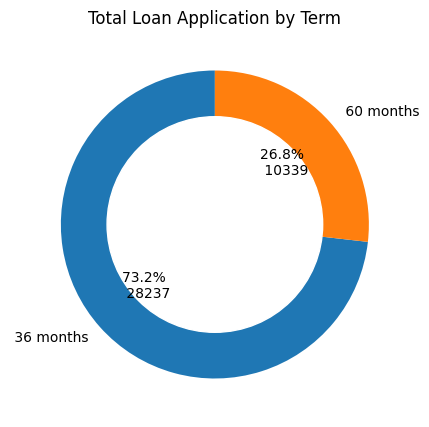

In [100]:
term_loan_application = df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))

plt.pie(
    term_loan_application,
    labels=term_loan_application.index,
    autopct=lambda p: f"{p:.1f}% \n { int(round(p/100.*sum(term_loan_application)))}", 
    startangle=90,
    wedgeprops={'width': 0.4}
)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

plt.title("Total Loan Application by Term")
plt.show()


###  Funded Amount by Employment Length 

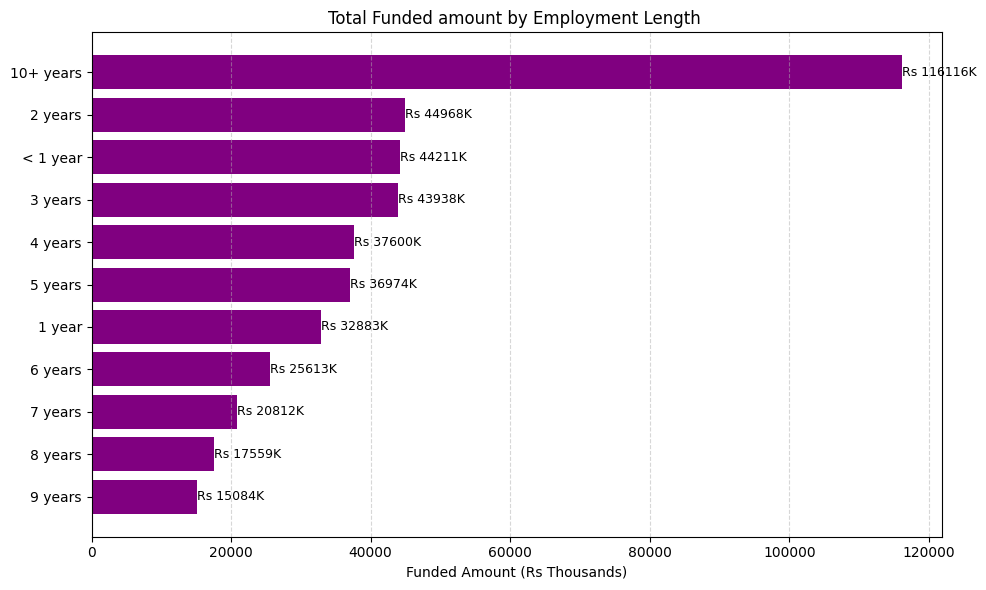

In [103]:
emp_funding= df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000
plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index, emp_funding , color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}K" , va='center', fontsize=9) 

plt.xlabel("Funded Amount (Rs Thousands)") 
plt.title("Total Funded amount by Employment Length ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

###  Received Amount by Employment Length 

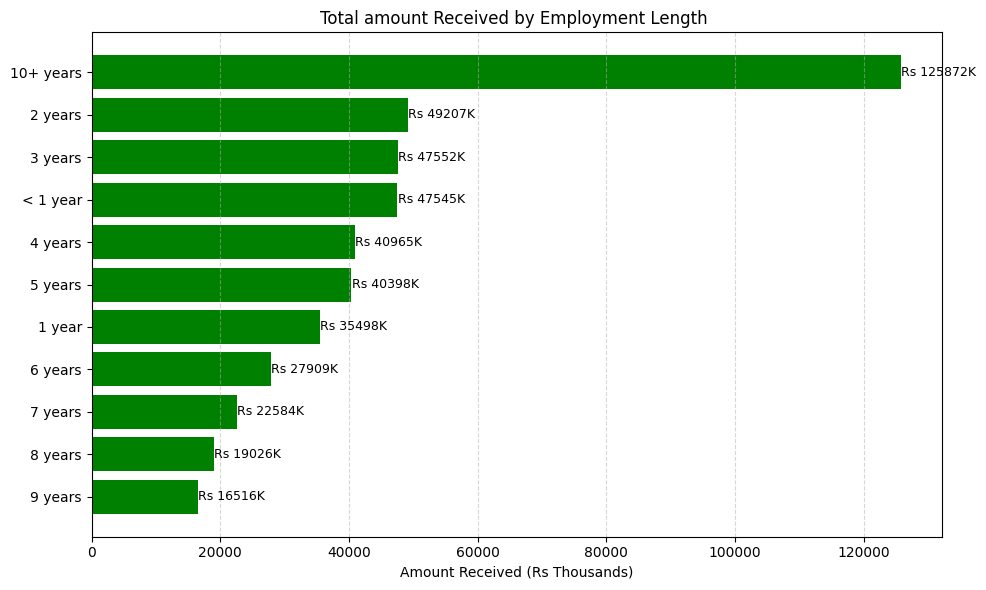

In [106]:
emp_received= df.groupby('emp_length')['total_payment'].sum().sort_values()/1000
plt.figure(figsize=(10,6))
bars= plt.barh(emp_received.index, emp_received , color='green')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}K" , va='center', fontsize=9) 

plt.xlabel("Amount Received (Rs Thousands)") 
plt.title("Total amount Received by Employment Length ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

###  Total Application  by Employment Length 

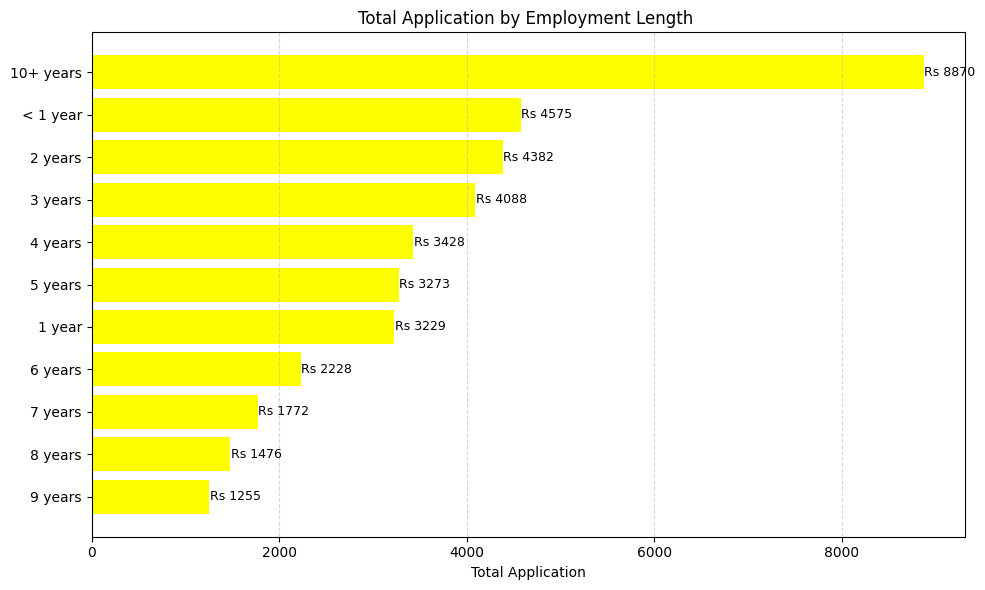

In [111]:
emp_application = df.groupby('emp_length')['id'].count().sort_values()
plt.figure(figsize=(10,6))
bars= plt.barh(emp_application.index, emp_application , color='yellow')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}" , va='center', fontsize=9) 

plt.xlabel("Total Application") 
plt.title("Total Application by Employment Length ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

###  Funded Amount by Loan Purpose

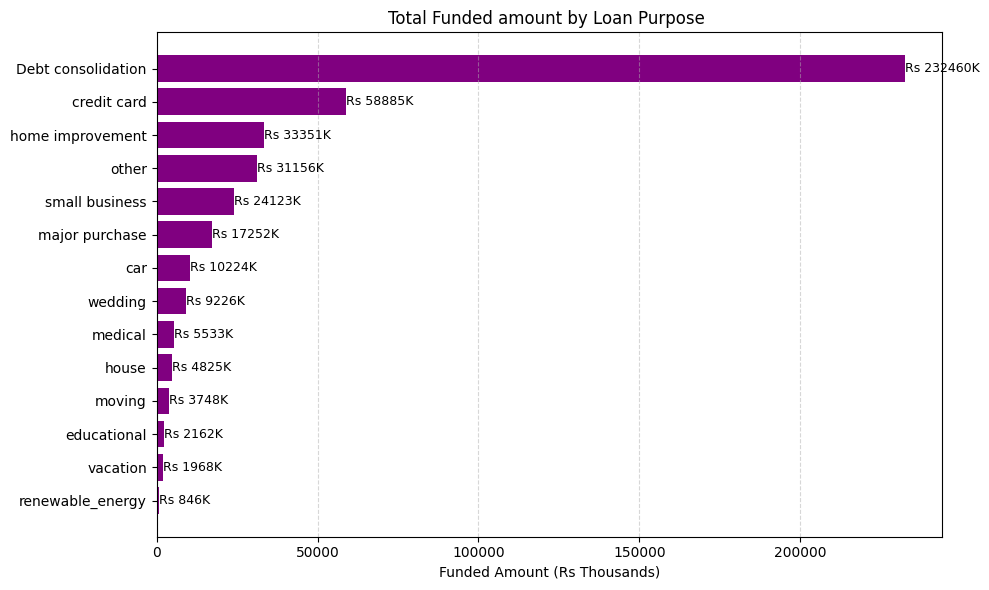

In [116]:
loan_purpose_funding= df.groupby('purpose')['loan_amount'].sum().sort_values()/1000
plt.figure(figsize=(10,6))
bars= plt.barh(loan_purpose_funding.index, loan_purpose_funding , color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}K" , va='center', fontsize=9) 

plt.xlabel("Funded Amount (Rs Thousands)") 
plt.title("Total Funded amount by Loan Purpose ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

### Amount Received by Loan Purpose

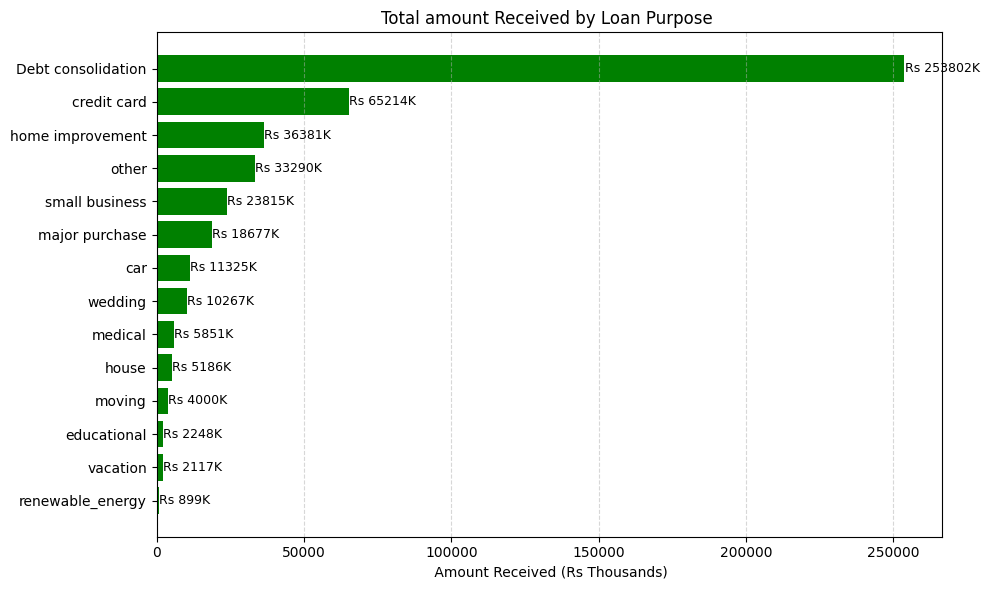

In [114]:
loan_purpose_amt_received = df.groupby('purpose')['total_payment'].sum().sort_values()/1000
plt.figure(figsize=(10,6))
bars= plt.barh(loan_purpose_amt_received.index, loan_purpose_amt_received , color='green')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}K" , va='center', fontsize=9) 

plt.xlabel(" Amount Received (Rs Thousands)") 
plt.title("Total amount Received by Loan Purpose ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

### Total Application by Loan Purpose

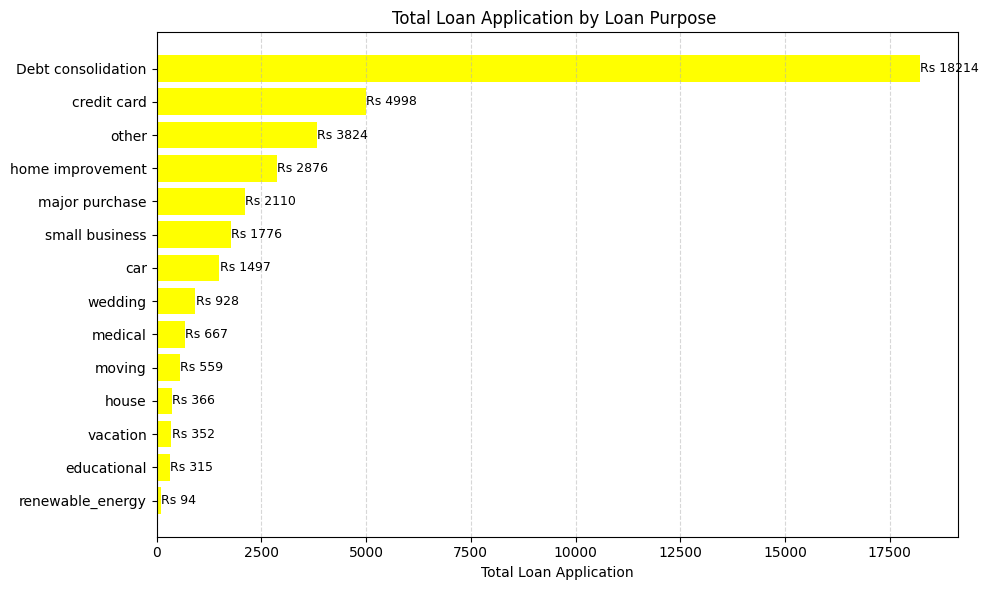

In [120]:
loan_purpose_application= df.groupby('purpose')['id'].count().sort_values()
plt.figure(figsize=(10,6))
bars= plt.barh(loan_purpose_application.index, loan_purpose_application , color='yellow')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y()+ bar.get_height()/2, 
            f"Rs {width:.0f}" , va='center', fontsize=9) 

plt.xlabel("Total Loan Application") 
plt.title("Total Loan Application by Loan Purpose ")
plt.grid(axis='x',linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

### Funded Amount by HomeOwnerShip

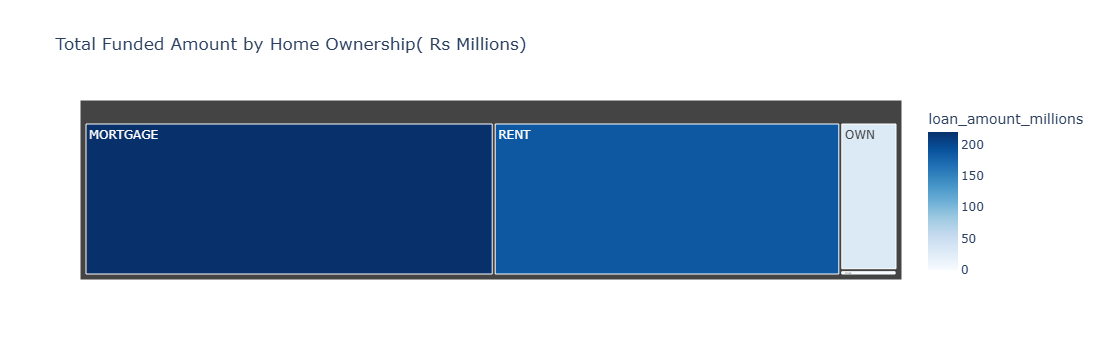

In [323]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index() 
home_funding['loan_amount_millions']= home_funding['loan_amount']/1000000

fig= px.treemap(home_funding, path= ['home_ownership'], 
               values= 'loan_amount_millions', 
               color='loan_amount_millions' , 
               color_continuous_scale='Blues', 
               title='Total Funded Amount by Home Ownership( Rs Millions)')
fig.show()

### Amount Received by HomeOwnerShip

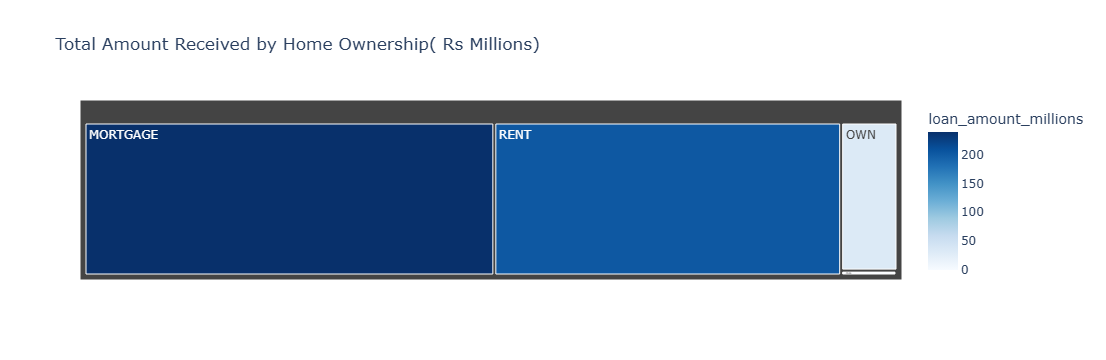

In [127]:
home_received = df.groupby('home_ownership')['total_payment'].sum().reset_index() 
home_received['loan_amount_millions']= home_received['total_payment']/1000000

fig= px.treemap(home_received, path= ['home_ownership'], 
               values= 'loan_amount_millions', 
               color='loan_amount_millions' , 
               color_continuous_scale='Blues', 
               title='Total Amount Received by Home Ownership( Rs Millions)')
fig.show()

### Application Received by HomeOwnerShip

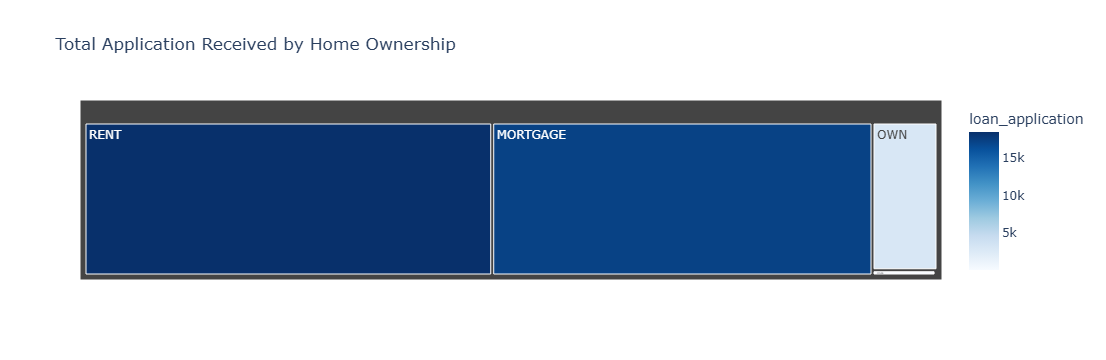

In [132]:
home_application = df.groupby('home_ownership')['id'].count().reset_index() 
home_application['loan_application']= home_application['id']

fig= px.treemap(home_application, path= ['home_ownership'], 
               values= 'loan_application', 
               color='loan_application' , 
               color_continuous_scale='Blues', 
               title='Total Application Received by Home Ownership')
fig.show()